# Introducción a EDA y descripción de datos

En el contexto de análisis de datos existen diferentes abordajes.

<img src="img/data_analysis_approach.png" width="700px">

## Análisis Exploratorio de Datos (EDA)

> EDA (_Exploratory Data Analysis_) se entiende como una filosofía de __análisis de datos__ en la que el investigador examina los datos __sin ideas preconcebidas para descubrir__ qué pueden decirle los datos sobre los fenómenos que se están estudiando. 
>
>&mdash; J. W. Tukey, _Exploratory data analysis_, vol. 2. Reading, MA, 1977.

Existen diferentes fases que son similares a lo establecido en modelos de procesos usado en KDD (_Knowledge Discovery in Database_) o mineria de datos (Fayyad et al., 1996) 

Un ejemplo de modelo de proceso es _**CR**oss-**I**ndustry **S**tandard **P**rocess for **D**ata **M**ining_ __CRISP-DM__. (Shearer, 2000)

<img src="img/crisp_dm.png" width="400px">

## Tipos de atributos

> Una __atributo__ representa una característica o rasgo representativo de un objeto.
>
> &mdash; Han, J., Kamber, M. & Pei, J. _Data mining: concepts and techniques_. Elsevier Science, 2012.
  

En general, los términos __atributo__, __característica__, __dimensión__ y __variable__ son usados indistintamente.

- En _data warehousing_ es comunmente usado _dimensión_.
- En _data mining_ (_Machine Learning/IA_) es usado el término _característica_.
- En estadística, se prefiere el término _variable_.


El tipo de un atributo está determinado por el conjunto de valores posibles que puede tener el atributo.

- Un __atributo nominal__ (o categórico), sus valores representan categorías sin clasificación intrínseca, p.ej., _género, región, afiliación religiosa_.
- Un __atributo ordinal__, sus valores representan categorías con alguna clasificación intrínseca. p.ej., _nivel de satisfacción, nivel educacional_.
- Los __atributos de escala de intervalo__ se miden en una escala de unidades de igual tamaño. p.ej., _temperatura, longitud, distancia_.
- Un __atributo de escala de relación__ (ratio) poseen las mismas características que los de tipo intervalo, con la distinción que poseen un cero absoluto (ausencia de la medida. Este tipo de variables están destinadas a no ser negativas. p.ej., _edad, peso, distancia_.

In [1]:
import pandas as pd

pd.read_csv('./src/summary_data_types.csv', index_col='Measure')

,Nominal,Ordinal,Interval,Ratio
Measure,,,,
Ordenar valores,N,Y,Y,Y
Fecuencia (contar),Y,Y,Y,Y
Moda,Y,Y,Y,Y
Medaiana,N,Y,Y,Y
Media,N,N,Y,Y
Cuantificar la diferencia valores,N,N,Y,Y
Sumar y sustraer valores,N,N,Y,Y
Multiplicar y dividir valores,N,N,N,Y
Existe el cero,N,N,N,Y


## Descripción de los datos

Descripciones estadísticas básicas para identificar las propiedades (descripción de los datos) de los datos e identificar si los valores de datos deben tratarse como ruido o valores atípicos (_outliers_).

- Estadísticos de tendencia central
- Estadísticos de dispersión
- Estadísticos de forma

### Estadísticos de tendencia central
Representan un _centro_  en torno al cual se encuentra un conjunto de datos: media, mediana y moda.

La __media__ (aritmética) es la suma arítmetica de los valores de la población, dividia por la cantidad de valores. Usualmente, se aplica sobre las categorías de tipo intervalo y ratio.

\begin{equation*}
\mu = \frac{1}{N} \sum_{i=1}^{N} x_i
\end{equation*}

In [2]:
academicos = pd.read_csv('data/salarios.csv')
academicos.head(5)

,jerarquia,disciplina,phd_experiencia,servicio_anios,genero,salario
0,Prof,B,56,49,Male,1869600
1,Prof,A,12,6,Male,930000
2,Prof,A,23,20,Male,1105150
3,Prof,A,40,31,Male,1312050
4,Prof,B,20,18,Male,1048000


Cálculo de la media usando la libreria Numpy:

In [3]:
import numpy as np

salarios = np.array(academicos['salario'])
salarios.mean()

1080237.8205128205

Cálculo de la media usando Pandas:

In [4]:
academicos[['phd_experiencia', 'servicio_anios', 'salario']].mean().round(1)

phd_experiencia         19.6
servicio_anios          15.1
salario            1080237.8
dtype: float64

La __media ponderada__, es usada cuando cada valor valor ($x_i$) tiene asociado un peso ($w_i$) o significancia,

\begin{equation*}
\overline{x} = \frac{\frac{1}{N} \sum_{i=1}^{N} w_i x_i}{\sum_{i=1}^{N}w_i}
\end{equation*}

puede ser obtenida con la función `numpy.average()`.

In [5]:
calificaciones = np.array([3.5, 6.1, 4.2, 5.0])
ponderaciones = np.array([0.2, 0.5, 0.2, 0.1])
np.average(calificaciones, weights=ponderaciones)

5.090000000000001

La __mediana__ representa el valor de la variable de posición central de un conjunto ordenado de datos.

\begin{equation*}
Median = x_{i1} + \left( \frac{\frac{N_M}{2} - N_{i-1} }{ f_i } \right) ( x_{i2} - x_{i1} )
\end{equation*}

donde, $x_{i1}$ es el límite inferior de la clase de la mediana;  $\frac{N_M}{2}$ es el número de los valores del conjunto de datos; $N_{i-1}$ es la frecuencia acumulada de todos los intervalos que están bajo el intervalo de la mediana; $f_i$  es la frecuencia absoluta de la clase de la media; $(x_{i2}-x_{i1})$ es la amplitud del intervalo de la clase de la mediana.

In [6]:
valores = np.array([1, 2, 3, 4, 5, 6, 7, 8])      #  (4 + 5)/2
np.median(valores)

4.5

In [7]:
np.median(academicos['salario'])

1046710.0

La __moda__ corresponde al valor más frecuente.

La función [`scipy.stats.mode()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) de la `scipy.stats`, obntiene el valor de la moda y su frecuencia.

In [8]:
import scipy.stats as stats

stats.mode(academicos['salario'])

ModeResult(mode=array([920000]), count=array([3]))

In [9]:
stats.mode(academicos['genero'])

ModeResult(mode=array(['Female'], dtype=object), count=array([39]))

### Estadísticos de dispersión

Proporcionan información sobre la variación de una variable: rango, rango intercuartil (IQR), desviación típica y varianza.

La __desviación estándar__ de la media es una medida que cuantifica la variación o la dispersión de un conjunto de valores numéricos.

\begin{equation*}
\sigma = \sqrt{ \frac{1}{N} \sum_{i=1}^{N} \left( x_i - \mu \right)^{2} }
\end{equation*}

- Valores bajos indican que los datos tienden a estar agrupados cerca de la media.
- Valores altos indican que los datos se extienden sobre un rango más amplio.

In [10]:
np.std(academicos['salario'])     # población completa

281117.06330941815

In [11]:
# muestra de una población, normalizada N-1
def desviacion_estandar(serie):
    suma = 0
    for xi in serie:
        suma += (xi - serie.mean()) ** 2
    return ( suma / (len(serie) -1) ) ** 0.5

desviacion_estandar(academicos['salario'])

282936.6102226418

El __rango__ de un conjunto de valores se define como la la diferencia entre el valor mayor y el valor menor.

In [12]:
np.max(salarios) - np.min(salarios)

1291600

El __rango intercuartil (IQR)__ se define como la distancia entre el primer cuartil (25%) y el tercer cuartil (75%).

\begin{equation*}
IQR = Q_{75\%} - Q_{25\%}
\end{equation*}

Es una medida que proporciona el rango cubierto por la __mitad central de los datos__, es decir, el 50% de los datos se encuentra dentro de este rango.

- Un __cuartil__ es un cuantil (puntos a intervalos regulares de la función de distribución) multiplicado por un cuarto de un conjunto de datos.
- El primer cuartil (Q1) corresponde con la mediana de la primera mitad de valores.
- El segundo cuartil (Q2) corresponde con la mediana de la serie.
- El tercer cuartil (Q3) corresponde con la mediana de la segunda mitad de valores.

La función [`pandas.qcut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) convierte una serie en una lista de N cuantiles. Esta función retorna una serie categórica nueva con los cuartiles como categorías.

- Para `n=4`, retorna los cuartiles.

In [13]:
cuartiles_salarios = pd.qcut(salarios, 4)
cuartiles_salarios.categories

IntervalIndex([(577999.999, 886125.0], (886125.0, 1046710.0], (1046710.0, 1267747.5], (1267747.5, 1869600.0]], dtype='interval[float64, right]')

In [14]:
cuartiles_salarios.categories[0] # Q1

Interval(577999.999, 886125.0, closed='right')

In [15]:
cuartiles_salarios.categories[2] # Q3

Interval(1046710.0, 1267747.5, closed='right')

In [16]:
IQR = cuartiles_salarios.categories[2].right - cuartiles_salarios.categories[0].right
print(IQR)

381622.5


In [17]:
cuartiles_salarios.categories[0].right

886125.0

Un __diagrama de caja__ (_boxplot_) representa gráficamente una serie de datos numéricos a tráves de sus cuartiles. Permite mostrar,

- Rango
- Valores atípicos (_outliers_)
- Mediana
- Cuartiles
- IQR
- Mínimo y máximo

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4a/Diagrama_de_caja.jpg" alt="Descripción blox plot" width="600" title="Cortesia de wikipedia.org">

La funcion [`pandas.DataFrame.plot.box()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html) muestra un _boxplot_, que representa, 
- Una caja que se extiende desde los valores del Q1 al Q3 
- Una línea en la mediana (Q2)
- Las líneas de mínimo y máximo, se establecen por defecto en $1.5 \times {IQR}$
- Los puntos atípicos son los que traspasa las líneas de míninmo y máximo

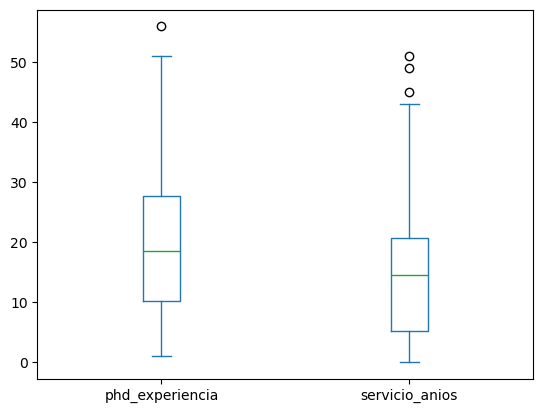

In [18]:
fig = academicos[['phd_experiencia', 'servicio_anios']].plot.box()

### Estadísticos de forma

Estadísticos que describen la forma de una __distribución__.

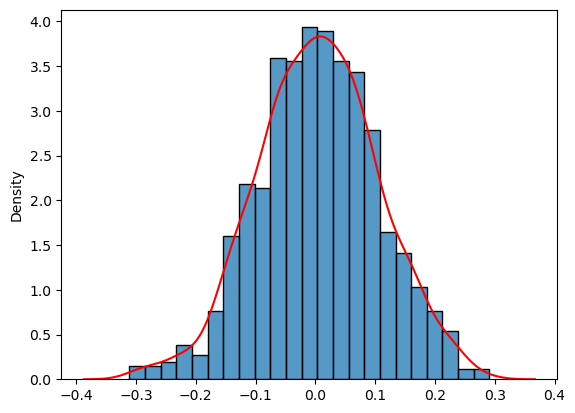

In [29]:
import seaborn as sns

mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000)
hist = sns.histplot(data=s, kde=False, stat='density')
kde = sns.kdeplot(data=s, color='red', ax=hist)

- Una distribución continua de valores aleatorios se llama __distribución normal__. 
- El número de valores que tiene la probabilidad es infinito y formará una curva continua.
- Cuando la curva de distribución de probabilidad continua tiene forma de campana, es una distribución normal y los datos deben distribuirse simétricamente en ambos lados.

El parámetro __skewness__ mide la asimetría (o falta de esta) de una distribución de probabilidad de una variable aleatoria:

\begin{equation*}
C = \frac{1}{N} \sum_{n=1}^{N} \left( \frac{ x_i - \overline{x} }{ \sigma } \right)^3
\end{equation*}

donde $\overline{x}$, $\sigma$ y $N$ son la media, la desviación estándar y el número ejemplos.

<img src="img/skewness.jpg" width="400px">

- Si una distribución es simétrica, existe el mismo número de valores a la derecha que a la izquierda de la media, por lo tanto, el mismo numéro de desviaciones a cada lado.
- Se dice __asimetría negativa__ cuando la cola más larga es hacia la izquierda.
- Se dice __asimetría positiva__ cuando la cola más larga es hacia la derecha.

In [20]:
def skewness(serie):
    x = np.mean(serie)
    sigma = np.std(serie)
    suma = 0
    for xi in serie:
        suma += ( (xi - x) / sigma ) ** 3
    return 1 / len(serie) * suma

skewness(salarios)

0.443361422461378

Usando la función [`scipy.stats.skew()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) de la librería `Scipy`.

In [21]:
stats.skew(salarios)

0.44336142246137766

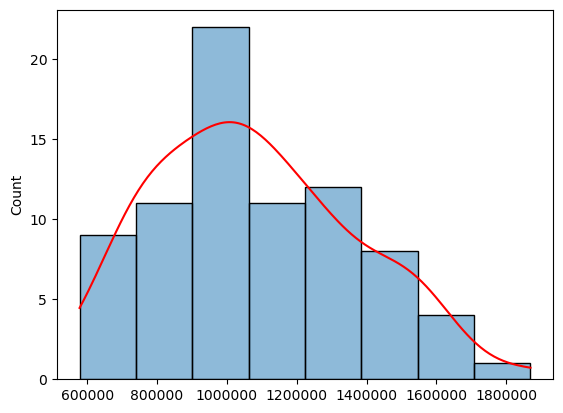

In [22]:
fig = sns.histplot(data=salarios, kde=True)
fig.lines[0].set_color('red')
fig.ticklabel_format(style='plain', axis='x')

La __kurtosis__ (exceso de kurtosis) es el parámetros que mide la forma de una distribución:

\begin{equation*}
D = \frac{1}{N} \sum_{n=1}^{N} \left( \frac{ x_i - \overline{x} }{ \sigma } \right)^4 - 3
\end{equation*}

donde $\overline{x}$, $\sigma$ y $N$ son la media, la desviación estándar y el número ejemplos.

__NOTA__: El coeficiente de kurtosis para una distribución normal (perfecta) es igual a 3. Esto permite obtener kurotisis positiva y negativa desde la distribución normal.

<img src="img/kurtosis.jpg" width="400px">

In [23]:
def kurtosis(serie):
    x = np.mean(serie)
    sigma = np.std(serie)
    suma = 0
    for xi in serie:
        suma += ( (xi - x) / sigma ) ** 4
    return (suma / len(serie)) - 3

kurtosis(salarios)

-0.4523692672246771

In [24]:
stats.kurtosis(salarios)

-0.45236926722467663

#### Resumen de las estadísticas de las variables

In [25]:
academicos.describe().round(1)  # usando Pandas, solo var. numéricas

,phd_experiencia,servicio_anios,salario
count,78.0,78.0,78.0
mean,19.6,15.1,1080237.8
std,12.3,12.1,282936.6
min,1.0,0.0,578000.0
25%,10.2,5.2,886125.0
50%,18.5,14.5,1046710.0
75%,27.8,20.8,1267747.5
max,56.0,51.0,1869600.0


#### Coeficiente de correlación lineal de Pearson

Para variables cuantitativas este índice __mide el grado de covariación entre distintas variables relacionadas linealmente__. Existe una correlación entre dos variables cuando ambas cambian de forma constante.

Un __diagrama de dispersión__, 
- Permite visualizar la relación entre dos variables. 
- Se utiliza una línea de tendencia para determinar correlación positiva, negativa o nula, entre ambas variables.

La función [`seaborn.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) combina dos funciones en una para representar modelos de regresión.

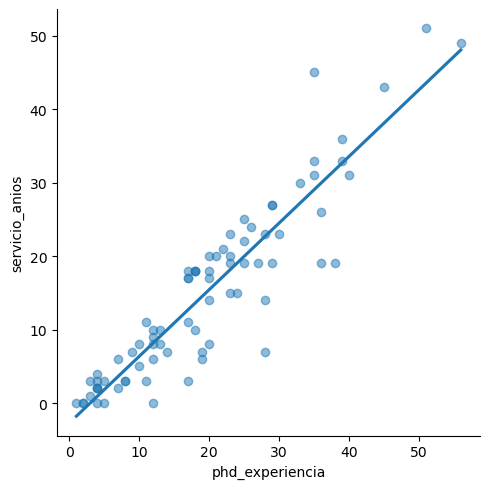

In [36]:
fig = sns.lmplot(
    data=academicos, x='phd_experiencia', y='servicio_anios', 
    fit_reg=True, ci=None, scatter_kws={'alpha':0.5}
    )

El coeficiente de correlación de Pearson puede ser obtenido con la siguiente expresión:

\begin{equation*}
\rho_{X,Y} =\frac{\sum_{i=1}^n \left(X_i -\bar{X} \right)\left(Y_j -\bar{Y} \right)}{\sqrt{\sum_{1=1}^n {\left(X_i -\bar{X} \right)}^2 \sum_{j=1}^n {\left(Y_i -\bar{Y} \right)}^2 }}
\end{equation*}

donde, $\bar{X}$ e $\bar{Y}$ es la media de $X$ e $Y$ , respectivamente.

El valor $\rho_{X,Y}$ varía en el intervalo $[-1,1]$, indicando el signo el sentido de la relación:

- Si $\rho = 1$, existe una correlación positiva perfecta, indica dependencia total entre las dos variables.
- Si $0 < \rho < 1$ es una corelación positiva.
- Si $\rho = 0$, indica que no existe relación lineal entre las dos variables.
- Si $-1 < \rho < 0$ es una corelación negativa.
- Si $\rho = -1$, existe una correlación negativa perfecta, indica dependencia total (relación inversa) entre las dos variables.

La función [`pandas.DataFrame.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) calcula la correlación por pares de las columnas de un DataFrame, excluyendo los valores nulos.

In [27]:
correlacion = academicos[['phd_experiencia', 'servicio_anios', 'salario']].corr()
correlacion

,phd_experiencia,servicio_anios,salario
phd_experiencia,1.000000,0.917194,0.576944
servicio_anios,0.917194,1.000000,0.532191
salario,0.576944,0.532191,1.000000


Un __mapa de calor__ (_heatmap_) permite obtener rápidamente información acerca de la relación entre variables.

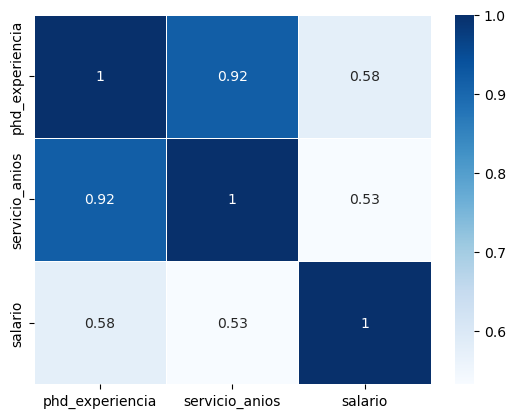

In [28]:
fig = sns.heatmap(correlacion, annot=True, linewidth=.5, cmap='Blues')

## Referencias

- J. W. Tukey, _Exploratory data analysis_, vol. 2. Reading, MA, 1977.
- U. Fayyad, G. Piatetsky-Shapiro, and P. Smyth, “The KDD process for extracting useful knowledge from volumes of data,” Communications of the ACM, vol. 39, no. 11, pp. 27–34, 1996.
- C. Shearer, “The CRISP-DM model: the new blueprint for data mining,” Journa of Data Warehousing, vol. 5, no. 4, pp. 13–22, 2000.  
- J. Han, M. Kamber, and J. Pei, _Data mining : concepts and techniques_. Burlington: Elsevier Science, 2012.